# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

<b>Who is the audience?</b></br>
The audience of the FIFA dataset is the Sports Enthusiasts, Sports Analysts, Sports Journalists, Team Sponsors. 

<b>What audience would know or do?</b></br>
With this data result,score,player of the match predictions could be made which is useful for investors or sponsors of the teams. Sports journalist can also support their prediction with the help of the data.This dataset is particularly useful for AI-driven applications such as trend analysis, predictive modeling, player and team insights, and clustering and segmentation. It can be used to study patterns in attendance, team performance, and participation over time, forecast future trends, analyze the impact of top scorers and team performances in historical contexts, and group tournaments based on attendance, performance, or geographical location.

<b>How the audience is going to understand?</b></br>
The FIFA dataset is divided into 3 files fifa_ranking_2022-10-06.csv, matches_1930_2022.csv and world_cup.csv and these files are linked by the team, host country, and dates present as columns in those files. Three files have 60 columns altogether but the most important ones are discussed below.
fifa_ranking_2022-10-06.csv: The dataset provides FIFA rankings as of October 6, 2022, for 212 countries worldwide. It includes each country's rank, score, previous rankings, and scores. This dataset is useful for analyzing performance trends, comparisons between teams, and identifying patterns in rankings over time.
matches_1930_2022.csv: This dataset contains detailed records of FIFA-organized matches spanning from 1930 to 2022. While the original dataset includes 44 attributes, a subset of attributes has been selected for their relevance and potential value for AI-driven analyse
world_cup.csv: This dataset provides a summary of all FIFA World Cup tournaments held between 1930 and 2022. It captures high-level details about each tournament, including the host country, participating teams, champions, runners-up, top scorers, and spectator statistics. This data offers an overview of the historical context and milestones of the World Cup, making it valuable for trend analysis and predictive modeling.



# 3. Homework - work with your own data

In [ ]:
#pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dganguli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
#!kaggle datasets download -d piterfm/fifa-football-world-cup --unzip

In [44]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [7]:
df_worldcup = pd.read_csv(r"C:\Users\dganguli\OneDrive - Adobe\Documents\Dip\Dip-Personal\Boston University\Semester 2 - Spring Semester\DX699 O2\Final Project\Notebooks\FIFA\world_cup.csv")
df_matches = pd.read_csv(r"C:\Users\dganguli\OneDrive - Adobe\Documents\Dip\Dip-Personal\Boston University\Semester 2 - Spring Semester\DX699 O2\Final Project\Notebooks\FIFA\matches_1930_2022.csv")
df_fifaranking = pd.read_csv(r"C:\Users\dganguli\OneDrive - Adobe\Documents\Dip\Dip-Personal\Boston University\Semester 2 - Spring Semester\DX699 O2\Final Project\Notebooks\FIFA\fifa_ranking_2022-10-06.csv")
df_worldcup.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

<b>Answers</b></br></br>
- Summarize the datasets using info() and describe()

In [ ]:
df_worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           22 non-null     int64 
 1   Host           22 non-null     object
 2   Teams          22 non-null     int64 
 3   Champion       22 non-null     object
 4   Runner-Up      22 non-null     object
 5   TopScorrer     22 non-null     object
 6   Attendance     22 non-null     int64 
 7   AttendanceAvg  22 non-null     int64 
 8   Matches        22 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 1.7+ KB


In [9]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        964 non-null    object 
 1   away_team                        964 non-null    object 
 2   home_score                       964 non-null    int64  
 3   home_xg                          128 non-null    float64
 4   home_penalty                     35 non-null     float64
 5   away_score                       964 non-null    int64  
 6   away_xg                          128 non-null    float64
 7   away_penalty                     35 non-null     float64
 8   home_manager                     964 non-null    object 
 9   home_captain                     644 non-null    object 
 10  away_manager                     964 non-null    object 
 11  away_captain                     644 non-null    object 
 12  Attendance            

In [10]:
df_fifaranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             211 non-null    object 
 1   team_code        211 non-null    object 
 2   association      211 non-null    object 
 3   rank             211 non-null    int64  
 4   previous_rank    211 non-null    int64  
 5   points           211 non-null    float64
 6   previous_points  211 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.7+ KB


- Are there any duplicate rows?

In [17]:
duplicates = df_worldcup[df_worldcup.duplicated(keep=False)]  # keep=False shows all occurrences

print(duplicates) #No duplicates in world_cup.csv

Empty DataFrame
Columns: [Year, Host, Teams, Champion, Runner-Up, TopScorrer, Attendance, AttendanceAvg, Matches]
Index: []


In [ ]:
duplicates = df_matches[df_matches.duplicated(keep=False)]  # keep=False shows all occurrences

print(duplicates) #No duplicates in matches_1930_2022.csv

Empty DataFrame
Columns: [home_team, away_team, home_score, home_xg, home_penalty, away_score, away_xg, away_penalty, home_manager, home_captain, away_manager, away_captain, Attendance, Venue, Officials, Round, Date, Score, Referee, Notes, Host, Year, home_goal, away_goal, home_goal_long, away_goal_long, home_own_goal, away_own_goal, home_penalty_goal, away_penalty_goal, home_penalty_miss_long, away_penalty_miss_long, home_penalty_shootout_goal_long, away_penalty_shootout_goal_long, home_penalty_shootout_miss_long, away_penalty_shootout_miss_long, home_red_card, away_red_card, home_yellow_red_card, away_yellow_red_card, home_yellow_card_long, away_yellow_card_long, home_substitute_in_long, away_substitute_in_long]
Index: []

[0 rows x 44 columns]


In [16]:
duplicates = df_fifaranking[df_fifaranking.duplicated(keep=False)]  # keep=False shows all occurrences

print(duplicates) #No duplicates in fifa_ranking.csv

Empty DataFrame
Columns: [team, team_code, association, rank, previous_rank, points, previous_points]
Index: []


- Are there any duplicate values in a given column (when this would be inappropriate?)

Checking whether world_up.csv has any duplidate year wise data.

In [19]:
df_worldcup.sample(n=5)

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
5,2002,"Korea Republic, Japan",32,Brazil,Germany,Ronaldo - 8,2705337,42271,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
14,1966,England,16,England,West Germany,Eusébio - 9,1563135,48848,32
18,1950,Brazil,15,Uruguay,Brazil,Ademir - 8,1045246,47511,22
15,1962,Chile,16,Brazil,Czechoslovakia,"Leonel Sánchez, Flórián Albert... - 4",893172,27912,32


In [ ]:
duplicates =df_worldcup[df_worldcup['Year'].duplicated(keep=False)]
print(duplicates)  # No duplicate yearwise record

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches


In [20]:
df_matches.sample(n=5)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
200,Paraguay,Japan,0,NaN,5.0,0,NaN,3.0,Gerardo Martino,NaN,...,NaN,['6|3:2|Yūichi Komano'],NaN,NaN,NaN,NaN,['118&rsquor;|0:0|Cristian Riveros'],"['58&rsquor;|0:0|Daisuke Matsui', '72&rsquor;|...",['60&rsquor;|0:0|Nelson Valdez|for Édgar Benít...,['65&rsquor;|0:0|Shinji Okazaki|for Daisuke Ma...
425,Spain,Paraguay,0,NaN,NaN,0,NaN,NaN,Javier Clemente,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['8&rsquor;|0:0|Sergi Barjuán', '87&rsquor;|0:...","['30&rsquor;|0:0|Celso Ayala', '76&rsquor;|0:0...",['52&rsquor;|0:0|Fernando Morientes|for Juan A...,['46&rsquor;|0:0|Carlos Paredes|for Jorge Luis...
190,Chile,Australia,3,NaN,NaN,1,NaN,NaN,Jorge Sampaoli,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,['86&rsquor;|2:1|Charles Aránguiz'],"['44&rsquor;|2:1|Tim Cahill', '58&rsquor;|2:1|...",['60&rsquor;|2:1|Felipe Gutiérrez|for Arturo V...,['49&rsquor;|2:1|Ryan McGowan|for Ivan Franjic...
246,Japan,Cameroon,1,NaN,NaN,0,NaN,NaN,Takeshi Okada,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,['90+1&rsquor;|1:0|Yuki Abe'],['72&rsquor;|1:0|Nicolas Nkoulou'],['69&rsquor;|1:0|Shinji Okazaki|for Daisuke Ma...,['63&rsquor;|1:0|Achille Emaná|for Joël Matip'...
841,West Germany,Northern Ireland,2,NaN,NaN,2,NaN,NaN,Sepp Herberger,Hans Schäfer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
duplicates =df_matches[df_matches['home_team'].duplicated(keep=False)]
print(duplicates)  # No duplicate rank record

         home_team away_team  home_score  home_xg  home_penalty  away_score  \
0        Argentina    France           3      3.3           4.0           3   
1          Croatia   Morocco           2      0.7           NaN           1   
2           France   Morocco           2      2.0           NaN           0   
3        Argentina   Croatia           3      2.3           NaN           0   
4          Morocco  Portugal           1      1.4           NaN           0   
..             ...       ...         ...      ...           ...         ...   
959      Argentina    France           1      NaN           NaN           0   
960     Yugoslavia    Brazil           2      NaN           NaN           1   
961        Romania      Peru           3      NaN           NaN           1   
962  United States   Belgium           3      NaN           NaN           0   
963         France    Mexico           4      NaN           NaN           1   

     away_xg  away_penalty      home_manager       

None of the columns in the matches_1930_2022.csv file should be looked into for duplicates as they are expected to have duplicate values. In the above example "home_team" has 948 duplicates in the file.

In [21]:
df_fifaranking.sample(n=5)

,team,team_code,association,rank,previous_rank,points,previous_points
168,Bermuda,BER,CONCACAF,169,168,977.47,977.47
5,Italy,ITA,UEFA,6,7,1726.14,1713.86
40,Canada,CAN,CONCACAF,41,43,1475.00,1473.82
107,Tajikistan,TJK,AFC,108,109,1185.70,1179.10
148,Kuwait,KUW,AFC,149,149,1053.41,1053.41


In [24]:
duplicates =df_fifaranking[df_fifaranking['rank'].duplicated(keep=False)]
print(duplicates)  # No duplicate rank record

duplicates =df_fifaranking[df_fifaranking['points'].duplicated(keep=False)]
print(duplicates)  # No duplicate rank record

Empty DataFrame
Columns: [team, team_code, association, rank, previous_rank, points, previous_points]
Index: []
Empty DataFrame
Columns: [team, team_code, association, rank, previous_rank, points, previous_points]
Index: []


There are no duplicate "ranks" in the fifa_ranking.csv

- What are the mean, median, and mode of each column?

In [29]:
# Select only numeric columns
numeric_df = df_worldcup.select_dtypes(include=['number'])

# Compute mean, median, and mode
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode()

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)

Mean:
 Year             1.978909e+03
Teams            2.236364e+01
Attendance       2.002201e+06
AttendanceAvg    4.272855e+04
Matches          4.381818e+01
dtype: float64

Median:
 Year                1980.0
Teams                 20.0
Attendance       1987738.0
AttendanceAvg      46705.0
Matches               45.0
dtype: float64

Mode:
     Year  Teams  Attendance  AttendanceAvg  Matches
0   1930   16.0      363000          20872     64.0
1   1934    NaN      375700          21353      NaN
2   1938    NaN      590549          23423      NaN
3   1950    NaN      768607          27912      NaN
4   1954    NaN      819810          29562      NaN
5   1958    NaN      893172          32808      NaN
6   1962    NaN     1045246          40572      NaN
7   1966    NaN     1545791          40679      NaN
8   1970    NaN     1563135          42271      NaN
9   1974    NaN     1603975          45367      NaN
10  1978    NaN     1865753          46039      NaN
11  1982    NaN     2109723         

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

In [41]:
df_worldcup.isna().sum(axis=0)

Year             0
Host             0
Teams            0
Champion         0
Runner-Up        0
TopScorrer       0
Attendance       0
AttendanceAvg    0
Matches          0
dtype: int64

No null values in world_cup.csv

In [42]:
df_matches.isna().sum(axis=0)

home_team                            0
away_team                            0
home_score                           0
home_xg                            836
home_penalty                       929
away_score                           0
away_xg                            836
away_penalty                       929
home_manager                         0
home_captain                       320
away_manager                         0
away_captain                       320
Attendance                           0
Venue                                0
Officials                          255
Round                                0
Date                                 0
Score                                0
Referee                            255
Notes                              891
Host                                 0
Year                                 0
home_goal                          246
away_goal                          393
home_goal_long                     246
away_goal_long           

In the matches1930_2022.csv there are lots of null values in the columns shown above where count is greater than 0. Out of them lot of columns are expected to have Null but few are not expected to have nulls such as home_captain, away_captain, officials, Referee etc. But since these are string type columns, we can not replace them with Mean 

In [43]:
df_matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

In [53]:
df_matches[df_matches['home_team']==df_matches['away_team']] # Checking if there are rows where both home and away teams are same. Found none

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long


In [56]:
df_matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [ ]:
df_matches['home_score'].max() # Checking score is not insanely high

np.int64(10)

- Encode any categorical variables (e.g. with one-hot encoding.)

In [50]:
categorical_columns = ['Champion']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_worldcup[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df_worldcup, one_hot_df], axis=1)

In [48]:
df_encoded.head(10)

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches,Champion_Argentina,Champion_Brazil,Champion_England,Champion_France,Champion_Germany,Champion_Italy,Champion_Spain,Champion_Uruguay,Champion_West Germany
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,2002,"Korea Republic, Japan",32,Brazil,Germany,Ronaldo - 8,2705337,42271,64,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1998,France,32,France,Brazil,Davor Šuker - 6,2903477,45367,64,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1994,United States,24,Brazil,Italy,"Hristo Stoichkov, Oleg Salenko - 6",3587538,68991,52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1990,Italy,24,West Germany,Argentina,Salvatore Schillaci - 6,2516215,48389,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1986,Mexico,24,Argentina,West Germany,Gary Lineker - 6,2394031,46039,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Conclusions:

- Are the data usable?  If not, find some new data!
Ans: Yes, the data is very much usuable and in good shape

- Do you need to modify or correct the data in some way?
Ans: Not immediately. It has both numerical and categorical data which can be used for regression and classification

- Is there any class imbalance?  (Categories that have many more items than other categories).
Ans: home_team, away_team, round, Score have class imbalance 

In [65]:
# Select only categorical columns
categorical_df = df_matches.select_dtypes(include=['object', 'category'])

# Compute class counts and percentages for each categorical column
for col in categorical_df.columns:
    print(f"\nClass distribution for {col}:")
    print(df_matches[col].value_counts())
    print(df_matches[col].value_counts(normalize=True) * 100)  # Percentage distribution


Class distribution for home_team:
home_team
Brazil                  85
Argentina               59
Italy                   57
England                 40
Germany                 40
                        ..
China PR                 1
United Arab Emirates     1
Norway                   1
Bolivia                  1
Haiti                    1
Name: count, Length: 82, dtype: int64
home_team
Brazil                  8.817427
Argentina               6.120332
Italy                   5.912863
England                 4.149378
Germany                 4.149378
                          ...   
China PR                0.103734
United Arab Emirates    0.103734
Norway                  0.103734
Bolivia                 0.103734
Haiti                   0.103734
Name: proportion, Length: 82, dtype: float64

Class distribution for away_team:
away_team
Mexico               42
France               35
England              34
Spain                33
Brazil               29
                     ..
Czech Republi

In [30]:
df_worldcup

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64
5,2002,"Korea Republic, Japan",32,Brazil,Germany,Ronaldo - 8,2705337,42271,64
6,1998,France,32,France,Brazil,Davor Šuker - 6,2903477,45367,64
7,1994,United States,24,Brazil,Italy,"Hristo Stoichkov, Oleg Salenko - 6",3587538,68991,52
8,1990,Italy,24,West Germany,Argentina,Salvatore Schillaci - 6,2516215,48389,52
9,1986,Mexico,24,Argentina,West Germany,Gary Lineker - 6,2394031,46039,52


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

I am replicating the graph in FIGURE 0.3 Example 1(after)

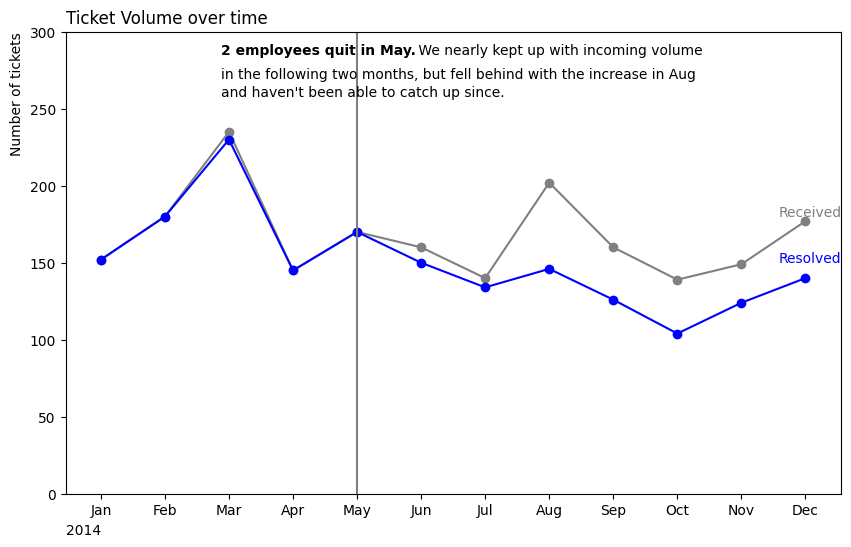

In [87]:
months = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
Monthly_Tickets = pd.DataFrame(months)
Monthly_Tickets.columns = ['Month']
Monthly_Tickets['Received'] = pd.DataFrame([152,180,235,145,170,160,140,202,160,139,149,177])
Monthly_Tickets['Processed'] = pd.DataFrame([152,180,230,145,170,150,134,146,126,104,124,140])
#print(Monthly_Tickets)

plt.figure(figsize=(10,6))
plt.plot(Monthly_Tickets['Month'],Monthly_Tickets['Received'],marker='o',color='gray')
plt.plot(Monthly_Tickets['Month'],Monthly_Tickets['Processed'],marker='o',color='blue')
plt.axvline(x='May', color='grey', linestyle='-', label='May Event')
plt.ylim(0,300)
plt.text(0.20, 0.95, "2 employees quit in May. ", fontweight='bold',transform=plt.gca().transAxes)
plt.text(0.45, 0.95, " We nearly kept up with incoming volume ", transform=plt.gca().transAxes)
plt.text(0.20, 0.90, "in the following two months, but fell behind with the increase in Aug ", transform=plt.gca().transAxes)
plt.text(0.20, 0.86, "and haven't been able to catch up since.", transform=plt.gca().transAxes)
plt.text(0.92, 0.60, "Received",  color='grey',transform=plt.gca().transAxes)
plt.text(0.92, 0.50, "Resolved", color='blue', transform=plt.gca().transAxes)
plt.xlabel("2014",loc='left')
plt.ylabel("Number of tickets",loc='top')
plt.title("Ticket Volume over time",loc='left')
plt.show()

Googled how to plot line graph and then add different colors to each line. Placing the text at the top was a bit of a work  